In [1]:
%matplotlib inline
""" handling files support packages """
from glob import glob

""" logic support packages """
import numpy as np
import pandas as pd

""" plot support packages """
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import Image

from matplotlib.pyplot import imshow

""" image trasformation packages """
from PIL import Image
import skimage.io as skio

""" statistical data visualization packages"""
import seaborn as sns

""" machine learning functions """
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

""" seaborn configurations """
sns.set_style('white')
sns.set_context('talk')
plt.rcParams['figure.figsize'] = 20, 10

In [2]:
from funcoes import *

In [3]:
captchas_files = sorted(glob('../testes/captcha_teste*.png'))
imgs = skio.imread_collection(captchas_files)

In [4]:
unblobbed = [remove_small_blobs(img, min_area=50, background=255) for img in imgs]

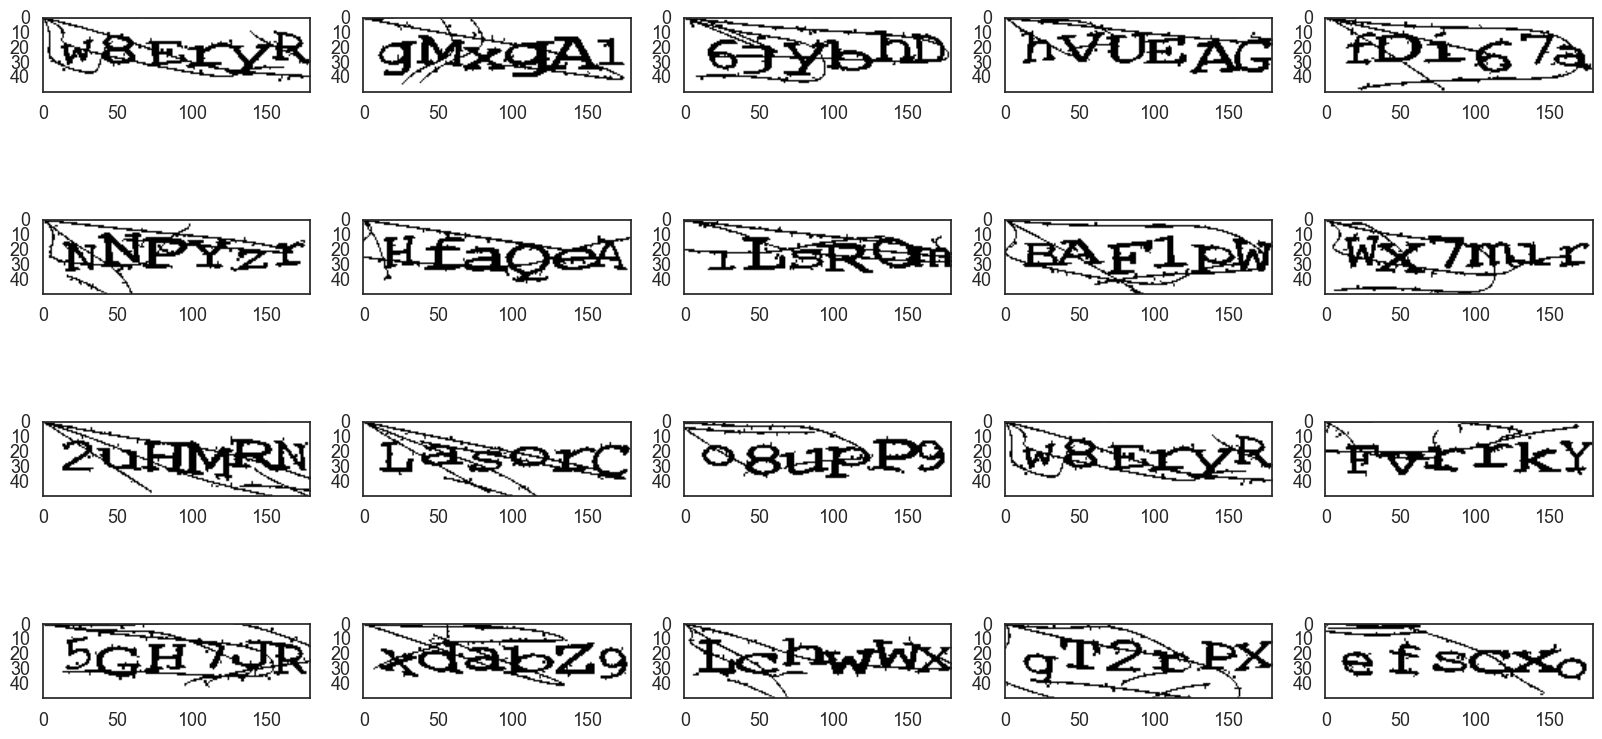

In [5]:
plot_captchas( unblobbed, (4, 5) )

In [6]:
certo = ['w8EryR', 'gMxgA1', '6jybhD', 'hVUEAG', 'fDi67a',
        'NNPYzr', 'HfaQeA', 'iLsROm', 'BAF1pW', 'Wx7m1r',
        '2uHMRN', 'Lasorc', 'o8upp9', 'w8EryR', 'FvrrkY',
        '5GH7JR', 'xdabZ9', 'Lchwwx', 'gT2rPX', 'efsCXo']

# Tentativa com Tesseract

In [7]:
#%%time
#%%capture
#respostasTS = []
#for i, captcha in enumerate(unblobbed):
#    resposta = tsrct_captcha(captcha)
#    #print("resposta "+ str(i) + ": " + resposta)
#    respostasTS.append(resposta)

In [8]:
#print(respostasTS)

# Tentativa com modelo ML

## Balanced

In [9]:
%%time
%%capture
respostasML1 = []
for i, captcha in enumerate(unblobbed):
    resposta = modela_captcha(captcha, tipo = "balanced")
    #print("resposta "+ str(i) + ": " + resposta)
    respostasML1.append(resposta)

CPU times: user 1h 6min 56s, sys: 9.99 s, total: 1h 7min 6s
Wall time: 1h 7min 30s


In [10]:
print(respostasML1)

['rHHpyh', 'aHxgA1', 'p1ynHB', 'H7V1AM', '1H1E7a', '1HH1s1', 'a1aQaH', '1LaHLe', 'a8F1pM', 'Nx7p1a', 'PnHMRT', '5HaarF', 'aHnnPB', 'rHHpyh', 'var1Hn', '83H7JA', 'aaanEs', 'LrHwBb', 'uT1p13', 'a1aaxu']


## Unbalanced

In [11]:
%%time
%%capture
#respostasML2 = []
#for i, captcha in enumerate(unblobbed):
#    resposta = modela_captcha(captcha, tipo = "RF")
#    #print("resposta "+ str(i) + ": " + resposta)
#    respostasML2.append(resposta)

CPU times: user 12 ms, sys: 4 ms, total: 16 ms
Wall time: 1.36 s


In [12]:
#print(respostasML2)

# Tentativa com funções super_score

In [13]:
%%time
%%capture
respostasSS = []
v = 1 # super score possui 3 versões até o momento (3 é a mais nova)
for i, captcha in enumerate(unblobbed):
    resposta = quebra_captcha(captcha, v)
    #print("resposta "+ str(i) + ": " + resposta)
    respostasSS.append(resposta)

CPU times: user 1h 2min 41s, sys: 6.16 s, total: 1h 2min 47s
Wall time: 1h 2min 49s


In [14]:
print(respostasSS)

['x8szvw', '1MkgA1', 'p1ybbc', 'hVOUAC', 'tJ1w7a', 'rNFTv1', 'HfaQeA', 'gLzEUw', 'HAF1pM', 'kK7m11', '7uUMBn', '5sss1t', 'bEupP9', 'x8szvw', 'xvtrk1', '3CH7Jz', 'xdabCu', 'LzUwkA', 'gT3H1z', 'a1ccxs']


# Tentativa com funções super_score2

In [15]:
%%time
%%capture
respostasSS2 = []
v = 2 # super score possui 3 versões até o momento (3 é a mais nova)
for i, captcha in enumerate(unblobbed):
    resposta = quebra_captcha(captcha, v)
    #print("resposta "+ str(i) + ": " + resposta)
    respostasSS2.append(resposta)

CPU times: user 1h 2min 40s, sys: 6.91 s, total: 1h 2min 47s
Wall time: 1h 2min 52s


In [16]:
print(respostasSS2)

['tKHzyx', 'jMxgA1', 'Ajvbh3', 'HVpUAB', '731E7a', 'rNFrz1', 'E1eQeA', 'jLaEWv', 'sAF1na', 'kK7mri', '7nHMBn', '5Bsn1F', 'sNunFu', 'tKHzyx', 'FatrkC', 'bAH7JA', 'aUab5s', 'hz3whN', 'jl21pz', 'w1unrs']


# Tentativa com funções super_score3

In [17]:
%%time
%%capture
respostasSS3 = []
v = 3
for i, captcha in enumerate(unblobbed):
    resposta = quebra_captcha(captcha, v)
    #print("resposta "+ str(i) + ": " + resposta)
    respostasSS3.append(resposta)

CPU times: user 1h 2min 19s, sys: 5.27 s, total: 1h 2min 24s
Wall time: 1h 2min 26s


In [18]:
print(respostasSS3)

['THTHgB', 'B3jRBB', 'j3BDHH', 'U1hBhB', 'jBUmjN', 'HHH2jR', 'HGyRHU', 'HRHBNN', 'HHjH3j', 'UhqHH2', 'hRN1N1', '51jUHT', 'hTHNj2', 'THTHgB', 'Pj1H3R', 'HT13Hj', 'huhH5j', 'TmjQL6', '5j5NRN', 'TDhNGT']


# Tentativa com funções super_score4

In [19]:
%%time
%%capture
respostasSS4 = []
v = 4 # super score possui 4 versões até o momento (4 é a mais nova)
for i, captcha in enumerate(unblobbed):
    resposta = quebra_captcha(captcha, v)
    #print("resposta "+ str(i) + ": " + resposta)
    respostasSS4.append(resposta)

CPU times: user 1h 2min 37s, sys: 6.6 s, total: 1h 2min 43s
Wall time: 1h 3min 19s


In [20]:
print(respostasSS4)

['w8LryL', 'gMxqA1', 'pjybpL', 'hVULLL', 'uHL67L', 'LNFrrL', 'LfaQsL', 'jLsMBw', 'BAF1pL', 'EK7mLL', '9uHMBL', 'Lvsar6', 'bgupF9', 'w8LryL', 'pyrLK9', '8oH7xL', 'HdabLL', 'LrU4ML', 'jL2rLL', 'e1suxL']


# Avaliação

In [21]:
ML1 = []
#ML2 = []
#tesseract = []
super_score = []
super_score2 = []
super_score3 = []
super_score4 = []
for i, captcha in enumerate(certo):

    ML1.append(0)
    #ML2.append(0)
    #tesseract.append(0)
    super_score.append(0)
    super_score2.append(0)
    super_score3.append(0)
    super_score4.append(0)
    
    for j, letra in enumerate(captcha):

        #if (letra == respostasTS[i][j]):
        #    tesseract[i] += 1
            
        if (letra == respostasML1[i][j]):
            ML1[i] += 1
        #if (letra == respostasML2[i][j]):
        #    ML2[i] += 1
            
        if (letra == respostasSS[i][j]):
            super_score[i] += 1
        if (letra == respostasSS2[i][j]):
            super_score2[i] += 1
        if (letra == respostasSS3[i][j]):
            super_score3[i] += 1
        if (letra == respostasSS4[i][j]):
            super_score4[i] += 1

In [22]:
#print(tesseract)

In [23]:
#print("pontos totais: " + str(sum(tesseract)/(20*6)))

In [24]:
#print(ML2)

In [25]:
#print("pontos totais: " + str(sum(ML2)/(20*6)))

In [26]:
print(ML1)

[1, 4, 1, 1, 2, 0, 2, 1, 3, 3, 3, 1, 0, 1, 1, 3, 1, 2, 1, 0]


In [27]:
print("pontos totais: " + str(sum(ML1)/(20*6)))

pontos totais: 0.25833333333333336


In [28]:
print(super_score)

[1, 4, 2, 3, 2, 1, 6, 1, 4, 3, 2, 1, 3, 1, 3, 3, 4, 2, 2, 0]


In [29]:
print("pontos totais: " + str(sum(super_score)/(20*6)))

pontos totais: 0.4


In [30]:
print(super_score2)

[1, 5, 3, 2, 2, 2, 3, 1, 3, 2, 2, 1, 1, 1, 3, 3, 2, 1, 1, 0]


In [31]:
print("pontos totais: " + str(sum(super_score2)/(20*6)))

pontos totais: 0.325


In [32]:
print(super_score3)

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [33]:
print("pontos totais: " + str(sum(super_score3)/(20*6)))

pontos totais: 0.008333333333333333


In [34]:
print(super_score4)

[4, 5, 3, 3, 2, 1, 3, 2, 5, 2, 3, 3, 3, 4, 1, 2, 3, 1, 2, 2]


In [35]:
print("pontos totais: " + str(sum(super_score4)/(20*6)))

pontos totais: 0.45


# Conclusão

Técnica *super_score* obteve melhores resultados na previsão.